# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview



In [71]:
# set up the environment
import pandas

train = pandas.read_csv('communities_train.csv')
val = pandas.read_csv('communities_val.csv')
test = pandas.read_csv('communities_test.csv')

X_train = train.iloc[:,0:-1] # all columns except the last one 
y_train = train.iloc[:,-1] # the last column
X_val = val.iloc[:,0:-1] # all columns except the last one
y_val = val.iloc[:,-1] # the last column
X_test = test.iloc[:,0:-1] # all columns except the last one
y_test = test.iloc[:,-1] # the last column



X train is  (298, 100)
y train is  (298,)
X val is  (298, 100)
y val is  (298,)
X test is  (299, 100)
y test is  (299,)


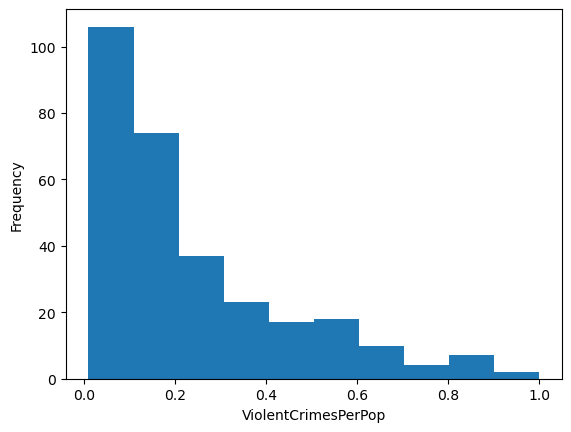

In [72]:
# Explore the data:

# Check the dimensions and data types of the data
print("X train is ",X_train.shape)
print("y train is ",y_train.shape)
print("X val is ",X_val.shape)
print("y val is ",y_val.shape)
print("X test is ",X_test.shape)
print("y test is ",y_test.shape)


# Look for missing values, outliers, and other data quality issues.
X_train.describe()
y_train.describe()

# Plot histograms, scatterplots, and other visualizations to get an idea of the relationships between the variables.
# Use the training data only.
# For axis labels, use the column names from the data set.
# For the target variable, use the column name "ViolentCrimesPerPop".

# Plot the target variable
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.xlabel('ViolentCrimesPerPop')
plt.ylabel('Frequency')
plt.show()

# # plot the first 10 features
# for i in range(10):
#     plt.hist(X_train.iloc[:,i])
#     plt.xlabel(X_train.columns[i])
#     plt.ylabel('Frequency')
#     plt.show()

# # Plot the first 10 features against the target variable
# for i in range(10):
#     plt.scatter(X_train.iloc[:,i], y_train)
#     plt.xlabel(X_train.columns[i])
#     plt.ylabel('ViolentCrimesPerPop')
#     plt.show()

# # Plot the first 10 features against each other
# for i in range(10):
#     for j in range(i+1,10):
#         plt.scatter(X_train.iloc[:,i], X_train.iloc[:,j])
#         plt.xlabel(X_train.columns[i])
#         plt.ylabel(X_train.columns[j])
#         plt.show()

# # Plot the first 10 features against each other, with the target variable as the color
# for i in range(10):
#     for j in range(i+1,10):
#         plt.scatter(X_train.iloc[:,i], X_train.iloc[:,j], c=y_train)
#         plt.xlabel(X_train.columns[i])
#         plt.ylabel(X_train.columns[j])
#         plt.show()

# # Plot the first 10 features against each other, with the target variable as the color
# # and the size of the points proportional to the target variable
# for i in range(10):
#     for j in range(i+1,10):
#         plt.scatter(X_train.iloc[:,i], X_train.iloc[:,j], c=y_train, s=10*y_train)
#         plt.xlabel(X_train.columns[i])
#         plt.ylabel(X_train.columns[j])
#         plt.show()









In [73]:
# print the name of the last coloumn first row in the communities_train.csv
# print(X_train.columns[0])
# print the name of the first row on y train
# print(y_train[0])

# Check if the 'ViolentCrimesPerPop' column exists in the DataFrame
# if 'ViolentCrimesPerPop' in train.columns:
#     # Get the target variable
#     target = train['ViolentCrimesPerPop']

#     # Get the features
#     features = train.drop('ViolentCrimesPerPop', axis=1)
# else:
#     print("Error: 'ViolentCrimesPerPop' column not found in the DataFrame.")



### Linear Regression Model

0    0.06
1    0.22
2    0.07
3    0.07
4    0.03
Name:  ViolentCrimesPerPop , dtype: float64
Mean squared error: 0.02
Variance score: 0.62


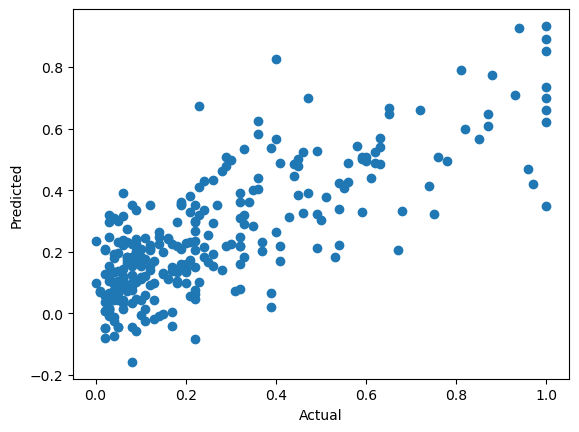

Mean squared error: 0.02
Variance score: 0.55
Linear Model Validation Data: RMSE = 0.15491210066258154
Linear Model Training Data: RMSE = 0.10419990101033945
                              OLS Regression Results                             
Dep. Variable:      ViolentCrimesPerPop    R-squared:                       0.759
Model:                               OLS   Adj. R-squared:                  0.637
Method:                    Least Squares   F-statistic:                     6.207
Date:                   Sat, 15 Apr 2023   Prob (F-statistic):           7.72e-28
Time:                           08:07:08   Log-Likelihood:                 251.07
No. Observations:                    298   AIC:                            -300.1
Df Residuals:                        197   BIC:                             73.27
Df Model:                            100                                         
Covariance Type:               nonrobust                                         
                 coef 

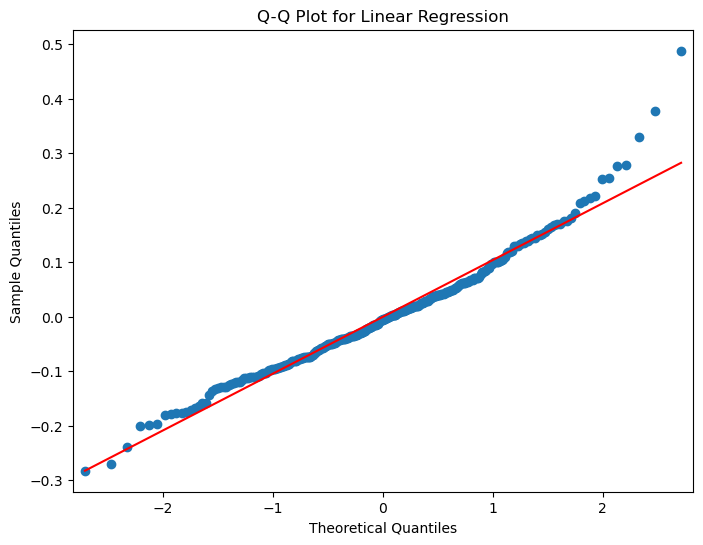

In [74]:
# Prepare the data 
# y_train has the target variable (ViolentCrimesPerPop) from the features.
print(y_train.head())


# Standardize the feature data so that each feature has a mean of 0 and a standard deviation of 1. This can help the models converge faster.
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# print(X_train.shape)


# Standardize the target variable as well.
# scaler = sklearn.preprocessing.StandardScaler()
# scaler.fit(y_train.values.reshape(-1,1))
# y_train = scaler.transform(y_train.values.reshape(-1,1))
# y_val = scaler.transform(y_val.values.reshape(-1,1))
# y_test = scaler.transform(y_test.values.reshape(-1,1))


# Use a library such as scikit-learn to train a linear regression model on the training data.
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(X_train, y_train)

# Use the model to predict the target variable for the validation data.
y_val_pred = model.predict(X_val)

# Evaluate the model using the metrics such as mean squared error and R squared.
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pred))
print('Variance score: %.2f' % r2_score(y_val, y_val_pred))

# make a plot of the predicted values vs the actual values
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# evaluated models on the test set.  
y_test_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# test - commented out the code below where a constant is added
import statsmodels.api as sm
import numpy as np
# X_val = sm.add_constant(X_val)
# X_train = sm.add_constant(X_train)  
# y_val = np.reshape(y_val, (len(y_val), 1))
# y_train = np.reshape(y_train, (len(y_train), 1))
# print("y train",y_train.shape)
# print("y val " ,y_val.shape)
# y_val = sm.add_constant(y_val)
# y_train = sm.add_constant(y_train)


# Use OLS to fit a linear regression model to the training data.
# model_OLS = sm.OLS(y_train, X_train)
# resulting_model = model_OLS.fit()
# regression_model = resulting_model
# print(resulting_model.summary())
# print(regression_model.summary())

# predicted = regression_model.predict(X_val)
# print('Model 1 RMSE = {}'.format(np.sqrt(mean_squared_error(y_val, regression_model.predict(X_val)))))
# print(regression_model.params)
# fig, ax = plt.subplots(figsize=(8,6))
# sm.qqplot(regression_model.resid, ax=ax, line='s')
# plt.title('Q-Q Plot for Linear Regression')
# plt.show()


# want to add a constant to the model (the y-axis intercept)
X_train_constant = sm.add_constant(X_train)
# also creating validation data
X_val_constant = sm.add_constant(X_val)
# create the linear model
model = sm.OLS(y_train, X_train_constant)
# fit the model without any regularisation
model_1_fit = model.fit()
pred = model_1_fit.predict(X_val_constant)
pred_train = model_1_fit.predict(X_train_constant)
print('Linear Model Validation Data: RMSE = {}'.format(
  np.sqrt(mean_squared_error(y_val, pred))))
print('Linear Model Training Data: RMSE = {}'.format(
  np.sqrt(mean_squared_error(y_train, pred_train))))
print(model_1_fit.summary())
print(model_1_fit.params)
fig, ax = plt.subplots(figsize=(8,6))
sm.qqplot(model_1_fit.resid, ax=ax, line='s')
plt.title('Q-Q Plot for Linear Regression')
plt.show()






<Figure size 640x480 with 0 Axes>

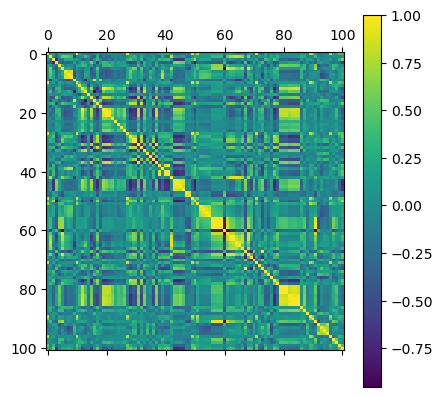

In [82]:
# Show the correlation between the Coefficients
def getcorr (columns):
    corr_coeffs = train[columns].corr()
    return corr_coeffs
new_corr = getcorr(train.columns)
plt.figure()
plt.matshow(new_corr)
plt.colorbar()

### Ridge Regression Model

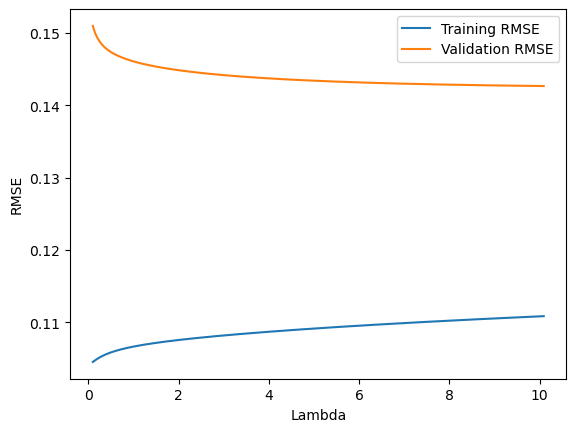

Optimal lambda: 10.089999999999995
Test RMSE: 0.13329580070187882


In [75]:
# Use scikit-learn to train a Ridge regression model on the training data
import sklearn.linear_model as lm
# model = lm.Ridge(alpha=0.1)
# model.fit(X_train, y_train)

# # Use the validation data to find the optimal value of the regularization parameter λ.
# model = lm.RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
# model.fit(X_train, y_train)
# print(model.alpha_)
# print(model.coef_)
# print(model.intercept_)
# print(model.score(X_val, y_val))

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize the Ridge regression model
model = Ridge()

# Define the range of lambda values to test
lambdas = np.arange(0.1, 10.1, 0.01)

# Initialize lists to store RMSE values for each lambda
train_rmse = []
val_rmse = []

# Loop over the lambda values and fit the model for each lambda
for l in lambdas:
    # Set the value of alpha to lambda
    model.set_params(alpha=l)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the training and validation data
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Calculate the RMSE for training and validation data
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, val_pred)))
    
# Plot the RMSE values for different lambda values
plt.plot(lambdas, train_rmse, label='Training RMSE')
plt.plot(lambdas, val_rmse, label='Validation RMSE')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Find the lambda value with the minimum validation RMSE
opt_lambda = lambdas[np.argmin(val_rmse)]
print('Optimal lambda:', opt_lambda)

# Fit the model on the entire training set using the optimal lambda
model.set_params(alpha=opt_lambda)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print('Test RMSE:', test_rmse)



In [76]:
def rmse(actual, pred):
  return np.sqrt(mean_squared_error(actual, pred))

def r_squared(actual, predicted):
  r2 = r2_score(actual, predicted)
  return r2

def adj_r2(actual, predicted, n, p):
  r2 = r2_score(actual, predicted)
  adjr2 = 1 - (1 - r2) * (n - 1) / (n - p - 1);
  return adjr2

def evaluate_regularisation(X_train, y_train,X_val, y_val, X_test, y_test,
                            response_mu, response_sigma, alpha_list, L1_L2):
  """
  Evaluates the efficacy of regularisation for a linear model.
  
  Identifies which values regression coffections and values of alpha
  (the hyperparam for the strength of regularisation) offers the
  best performance on the validation set.

  Evaluation is required to be performed on the standardised data, to allow
  for ease of comparison (where standardised here refers to normalisation,
  such that the data has a mean of zero and a std. of one.) This will show
  
  Will display the coefficients used in the NORMALISED/STANDARDISED model 
  used to achieve the best results.

  Is able to evaluate both Ridge and Lasso regularisation (and Elasticnet
  really if you want to try it, but in this class we are sticking to Ridge
  and Lasso).

  Args:
    x_train (np.array):
      normalised predictor variable training data
    y_train (np.array):
      normalised response variable training data
    x_val (np.array):
      normalised predictor variable validation data
    y_val (np.array):
      normalised response variable validation data
    x_test (np.array):
      normalised predictor variable test data
    y_test (np.array):
      normalised response variable test data
    response_mu (np.array):
      the mean value of the response variable from the TRAINING data
    response_sigma (np.array):
      the standard deviation  of the response variable from the TRAINING data
    alpha_list (list[np.float]):
      proposed values for alpha (the regularisation hyper param, also called
      lambda in other texts and in the lectures). Each value must be greater
      than zero.
    L1_L2 (np.int):
      Boolean to say whether we want to perform Ridge or Lasso regularisation.
      When zero, will be Ridge, When one, will be Lasso.
      Note: this value can actually be a float between zero and one as well 
      if you want to try Elasticnet regression, but here in this class would
      recommend sticking to just Ridge and Lasso.

  Retuns:
    NA
  """
  # Ridge: L1_L2 = 0
  # Lasso: L1_L2 = 1
  # create the model
  model = sm.OLS(y_train, X_train)
  # initialise the value for best RMSE that is obnoxiously large, as we want this be 
  # overwritten each time RMSE is smaller, since smaller is better and we want to 
  # update our best models each time the RMSE is smaller.
  best_rmse = 10e12
  best_alpha = []
  best_coeffs = []
  
  rmse_val = []
  rmse_train = []
  coeffs = []          # only needed for trace plots

  for alpha in alpha_list:
    model_cross_fit = model.fit_regularized(alpha=alpha, L1_wt=L1_L2)
    train_pred = model_cross_fit.predict(X_train)
    val_pred = model_cross_fit.predict(X_val)
    # want to append the rmse value to a list, as will plot all values later on
    rmse_train.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    rmse_val.append(np.sqrt(mean_squared_error(y_val, val_pred)))
    coeffs.append(model_cross_fit.params)
    # if this is the model with the lowest RMSE, lets save it
    # the [-1] index says get the last value from the list (which is the most recent RMSE)
    if rmse_val[-1] < best_rmse:
      best_rmse = rmse_val[-1]
      best_alpha = alpha
      best_coeffs = model_cross_fit.params
      
  print('Best values on Validation Data set')
  # extract the gradient and the bias from the coefficients
  # The reshape will make sure the slope is a column vector
  slope = np.array(best_coeffs[0:]).reshape(-1, 1)
  # the intercept coefficient is the last index variable, which was included with the
  # sm.add_constant() method
  # use the @ operator to perform vector/matrix multiplication
  pred_val_rescaled = (X_val @ slope) * response_sigma + response_mu
  pred_test_rescaled = (X_test @ slope) * response_sigma + response_mu
  pred_train_rescaled = (X_train @ slope) * response_sigma + response_mu
  best_r2 = r_squared(y_train * response_sigma + response_mu, pred_train_rescaled)
  best_adj_r2 = adj_r2(y_train * response_sigma + response_mu, pred_train_rescaled,
                           X_train.shape[0], X_train.shape[1]) 
  best_val_rmse = np.sqrt(mean_squared_error(y_val* response_sigma + response_mu, pred_val_rescaled))
  best_test_rmse = np.sqrt(mean_squared_error(y_test* response_sigma + response_mu, pred_test_rescaled))
  print('Best R Squared = {}'.format(best_r2))
  print('Best Adjusted = {}'.format(best_adj_r2))
  print('Best RMSE (val) = {}'.format(best_val_rmse))
  print('Best RMSE (test) = {}'.format(best_test_rmse))
  print('Best coefficients on the normalised model')
  print('Best slope = {}'.format(slope))
  
  # now plotting some data
  fig, axs = plt.subplots(5, figsize=(15, 25))
  
  # plot the first values of alpha vs RMSE for train and validation data    
  axs[0].plot(np.array(alpha_list), rmse_train)
  axs[0].plot(np.array(alpha_list), rmse_val)
  axs[0].legend(['Training', 'Validation'])
  axs[0].set_title('RMSE vs Lambda')
  axs[0].set_xlabel('Lambda')
  axs[0].set_ylabel('RMSE')    
  
  # plot prediction and true values for test set
  axs[1].plot((y_test*response_sigma + response_mu))
  axs[1].plot((X_test @ slope) * response_sigma + response_mu)
  axs[1].legend(['Actual', 'Predicted'])
  axs[1].set_title('Test Set Performance')
  
  # plotting the Q-Q plot
  train_pred = (X_train @ slope).reshape(y_train.shape)
  resid = y_train - train_pred
  sm.qqplot(resid, ax=axs[2], line='s')
  axs[2].set_title('Q-Q Plot for Linear Regression')

  # plot the residuals as well
  axs[3].scatter(train_pred, resid)
  axs[3].set_title('Residuals for training set')
  axs[3].set_xlabel('Predicted')
  axs[3].set_ylabel('Residuals')

  # trace plot of coefficients
  axs[4].plot(np.array(alpha_list), coeffs)
  axs[4].set_title('Trace PLot of Coefficients')
  axs[4].set_xlabel('Lambda')
  axs[4].set_ylabel('Coefficient Value')   

Best values on Validation Data set
Best R Squared = 0.7185647427447908
Best Adjusted = 0.5757042060670196
Best RMSE (val) = 0.142474394713848
Best RMSE (test) = 0.13154277144365992
Best coefficients on the normalised model
Best slope = [[ 0.00654498]
 [-0.08261657]
 [ 0.08734514]
 [-0.05381302]
 [ 0.00138797]
 [-0.17480713]
 [-0.06013663]
 [ 0.04399552]
 [ 0.06563322]
 [ 0.06039095]
 [ 0.00088043]
 [ 0.07462407]
 [ 0.05172256]
 [-0.05027768]
 [ 0.0145202 ]
 [-0.10611063]
 [ 0.06574661]
 [ 0.0472038 ]
 [-0.08570737]
 [ 0.02329233]
 [ 0.00902525]
 [ 0.00711943]
 [-0.00206784]
 [-0.03520741]
 [ 0.08767832]
 [ 0.00606919]
 [ 0.05248105]
 [-0.02268259]
 [-0.11045956]
 [-0.04505044]
 [ 0.03164664]
 [ 0.03493553]
 [-0.09916151]
 [ 0.13181493]
 [-0.07786563]
 [-0.00953879]
 [ 0.01238723]
 [-0.02661636]
 [-0.01863145]
 [ 0.00841003]
 [-0.00555766]
 [-0.00972973]
 [ 0.06706536]
 [-0.09915312]
 [-0.11831371]
 [-0.07773286]
 [-0.01980406]
 [ 0.06102459]
 [-0.09878858]
 [ 0.05979634]
 [ 0.11763644]

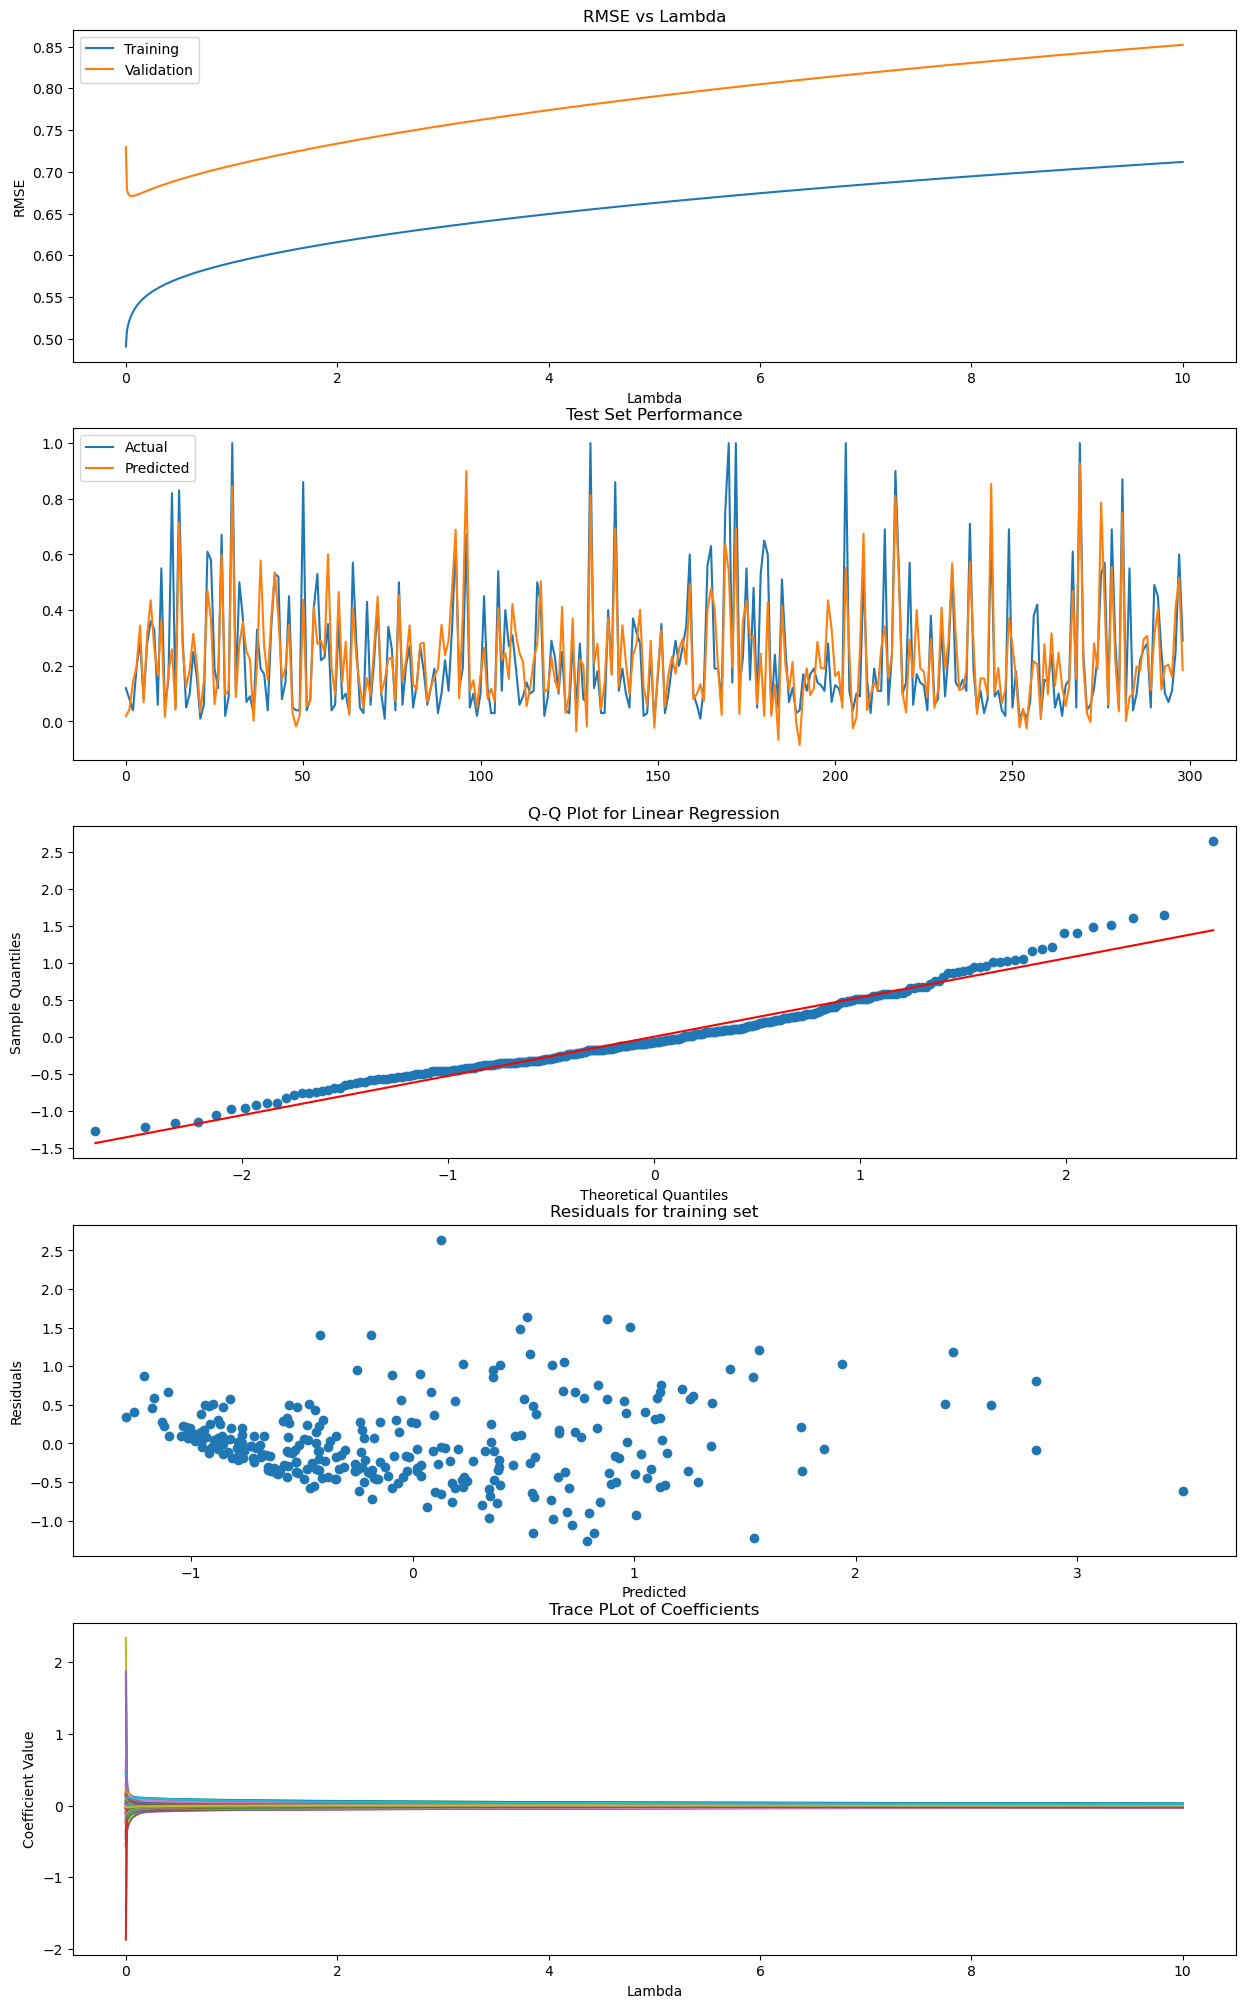

In [77]:
def standardise(data):
  """ Standardise/Normalise data to have zero mean and unit variance

  Args:
    data (np.array):
      data we want to standardise (usually covariates)

    Returns:
      Standardised data, mean of data, standard deviation of data
  """
  mu = np.mean(data, axis=0)
  sigma = np.std(data, axis=0)
  scaled = (data - mu) / sigma
  return scaled, mu, sigma


X_train_std, mu_train_x, sigma_train_x = standardise(X_train)
Y_train_std, mu_train_y, sigma_train_y = standardise(y_train)
X_val_std = (X_val - mu_train_x)/sigma_train_x
Y_val_std = (y_val - mu_train_y)/sigma_train_y
X_test_std = (X_test - mu_train_x)/sigma_train_x
Y_test_std = (y_test - mu_train_y)/sigma_train_y

alpha_list = np.linspace(0, 10.0, 1000)
evaluate_regularisation(X_train_std, Y_train_std, X_val_std, Y_val_std, X_test_std, Y_test_std,
                        mu_train_y, sigma_train_y, alpha_list, 0)

10.0
[ 0.00196383 -0.02366881  0.01593555 -0.01223466 -0.0017988  -0.04988401
 -0.01867887  0.01490041  0.01910211  0.01500012 -0.00205055  0.01663752
  0.01696631 -0.01463147  0.00470524 -0.0281806   0.01881178  0.01129733
 -0.01980332  0.00776955  0.00342064 -0.00224281  0.00108584 -0.00780875
  0.02002457  0.0003858   0.01057007 -0.00642021 -0.03355445 -0.01410549
  0.01045079  0.01351724 -0.02426275  0.0341717  -0.01770871 -0.00170885
  0.00444918 -0.00454905 -0.00415771  0.00265577 -0.00412784 -0.00217506
  0.01994802 -0.02369664 -0.02774817 -0.01514053 -0.00360954  0.01681353
 -0.02828016  0.01466656  0.02445613 -0.01120992 -0.00821539 -0.00887323
 -0.00932469  0.02135558 -0.01389349 -0.01205254  0.01142488  0.01223902
  0.00181684  0.00909433  0.01246456 -0.00013914  0.03304234 -0.02379025
  0.01022731 -0.02379646  0.03237014  0.0055637   0.00041051  0.01769642
 -0.00975162 -0.00127385  0.02045572 -0.01100972  0.00095226 -0.00165521
  0.0115664  -0.00172818 -0.01032178 -0.014991

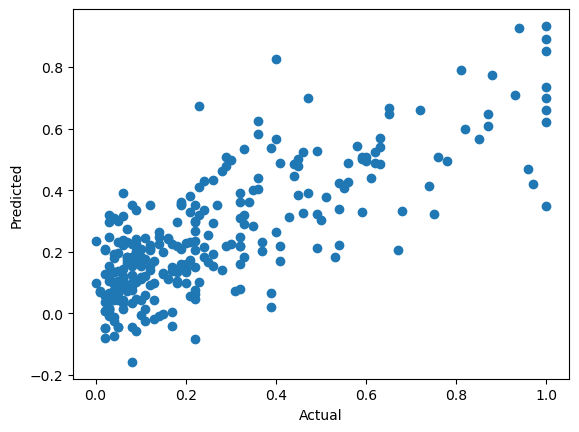

X train  (298, 100)
y train (298,)
X test (299, 100)
y test (299,)
Mean squared error: 0.02
Variance score: 0.66


In [78]:
# Train a Ridge regression model to predict the number of 
# violent crimes per captia from the socio-economic data.
import sklearn.linear_model as lm
ridge_model = lm.Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Use the validation data to find the optimal value of the regularization parameter λ.
# Ridge cv expects 101 values for alpha
ridge_model = lm.RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
ridge_model = lm.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X_train, y_train)
print(ridge_model.alpha_)
print(ridge_model.coef_)
print(ridge_model.intercept_)
print(ridge_model.score(X_val, y_val))

# Evaluate the model using metrics such as mean squared error and R-squared.
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pred))
print('Variance score: %.2f' % r2_score(y_val, y_val_pred))

# make a plot of the predicted values vs the actual values
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Check the size of X_train and y_train
print("X train " ,X_train.shape)
print("y train",y_train.shape)
print("X test",X_test.shape)
print("y test",y_test.shape)


# evaluated models on the test set.
y_test_pred = ridge_model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))



### Lasso Regression Model

0.01
[ 0.         -0.          0.01563958 -0.0066934   0.         -0.
 -0.          0.         -0.         -0.          0.          0.00853948
 -0.          0.         -0.         -0.         -0.          0.
 -0.00418139 -0.         -0.          0.         -0.         -0.
  0.00575871  0.          0.00060727  0.          0.         -0.
  0.         -0.         -0.          0.         -0.0056003  -0.
 -0.         -0.          0.         -0.          0.00622918  0.
  0.         -0.         -0.06664768 -0.         -0.         -0.
 -0.          0.0052633   0.03521568  0.         -0.         -0.
  0.          0.         -0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.00073944 -0.          0.02208657  0.         -0.          0.00924226
 -0.00318913 -0.          0.00991613 -0.00291801  0.00503242  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00549636  0.         -0.          0.
  0.

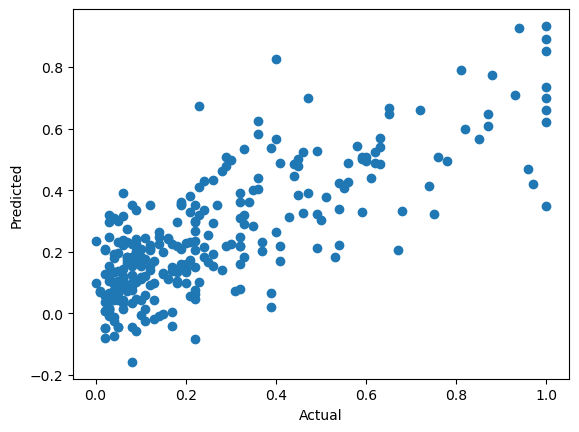

Mean squared error: 0.02
Variance score: 0.66


In [79]:
# Train a Lasso regression model:
# Use scikit-learn to train a LASSO regression model on the training data.
import sklearn.linear_model as lm
lasso_model = lm.Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

#  fit_regularized is a method of the OLS class and changing the refit parameter to False will 
# prevent the model from refitting the data. when turned to true, it will refit the data and return the model. 


# Use the validation data to find the optimal value of the regularization parameter λ by using a multiple for loops until the best value is found.
# Lasso cv expects 101 values for alpha
lasso_model = lm.LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
lasso_model.fit(X_train, y_train)
print(lasso_model.alpha_)
print(lasso_model.coef_)

# Evaluate the model using metrics such as mean squared error and R-squared.
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pred))
print('Variance score: %.2f' % r2_score(y_val, y_val_pred))

# make a plot of the predicted values vs the actual values
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# evaluated models on the test set.
y_test_pred = lasso_model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# Refine the model as necessary based on the validation results.


Best values on Validation Data set
Best R Squared = 0.7134097799342415
Best Adjusted = 0.5679325108653286
Best RMSE (val) = 0.14422467514776394
Best RMSE (test) = 0.13433655408459
Best coefficients on the normalised model
Best slope = [[ 0.01686057]
 [-0.12863666]
 [ 0.15034114]
 [-0.03359002]
 [-0.00329562]
 [ 0.        ]
 [ 0.        ]
 [ 0.11409153]
 [ 0.        ]
 [ 0.11582227]
 [ 0.        ]
 [ 0.08619093]
 [ 0.06016083]
 [-0.08064985]
 [ 0.        ]
 [-0.09606443]
 [ 0.        ]
 [-0.00365155]
 [-0.1231907 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.01615791]
 [-0.04643115]
 [ 0.11059447]
 [ 0.00539523]
 [ 0.05301538]
 [ 0.00205908]
 [-0.24423646]
 [-0.05900113]
 [ 0.17704266]
 [ 0.14526313]
 [-0.11639816]
 [ 0.10340084]
 [-0.07572005]
 [-0.0055764 ]
 [-0.02777465]
 [-0.15309803]
 [-0.00948536]
 [ 0.0076383 ]
 [-0.03565287]
 [ 0.        ]
 [ 0.29578288]
 [-0.37645718]
 [ 0.        ]
 [-0.09061656]
 [ 0.00439722]
 [ 0.        ]
 [-0.06776403]
 [ 0.09161958]
 [ 0.        ]


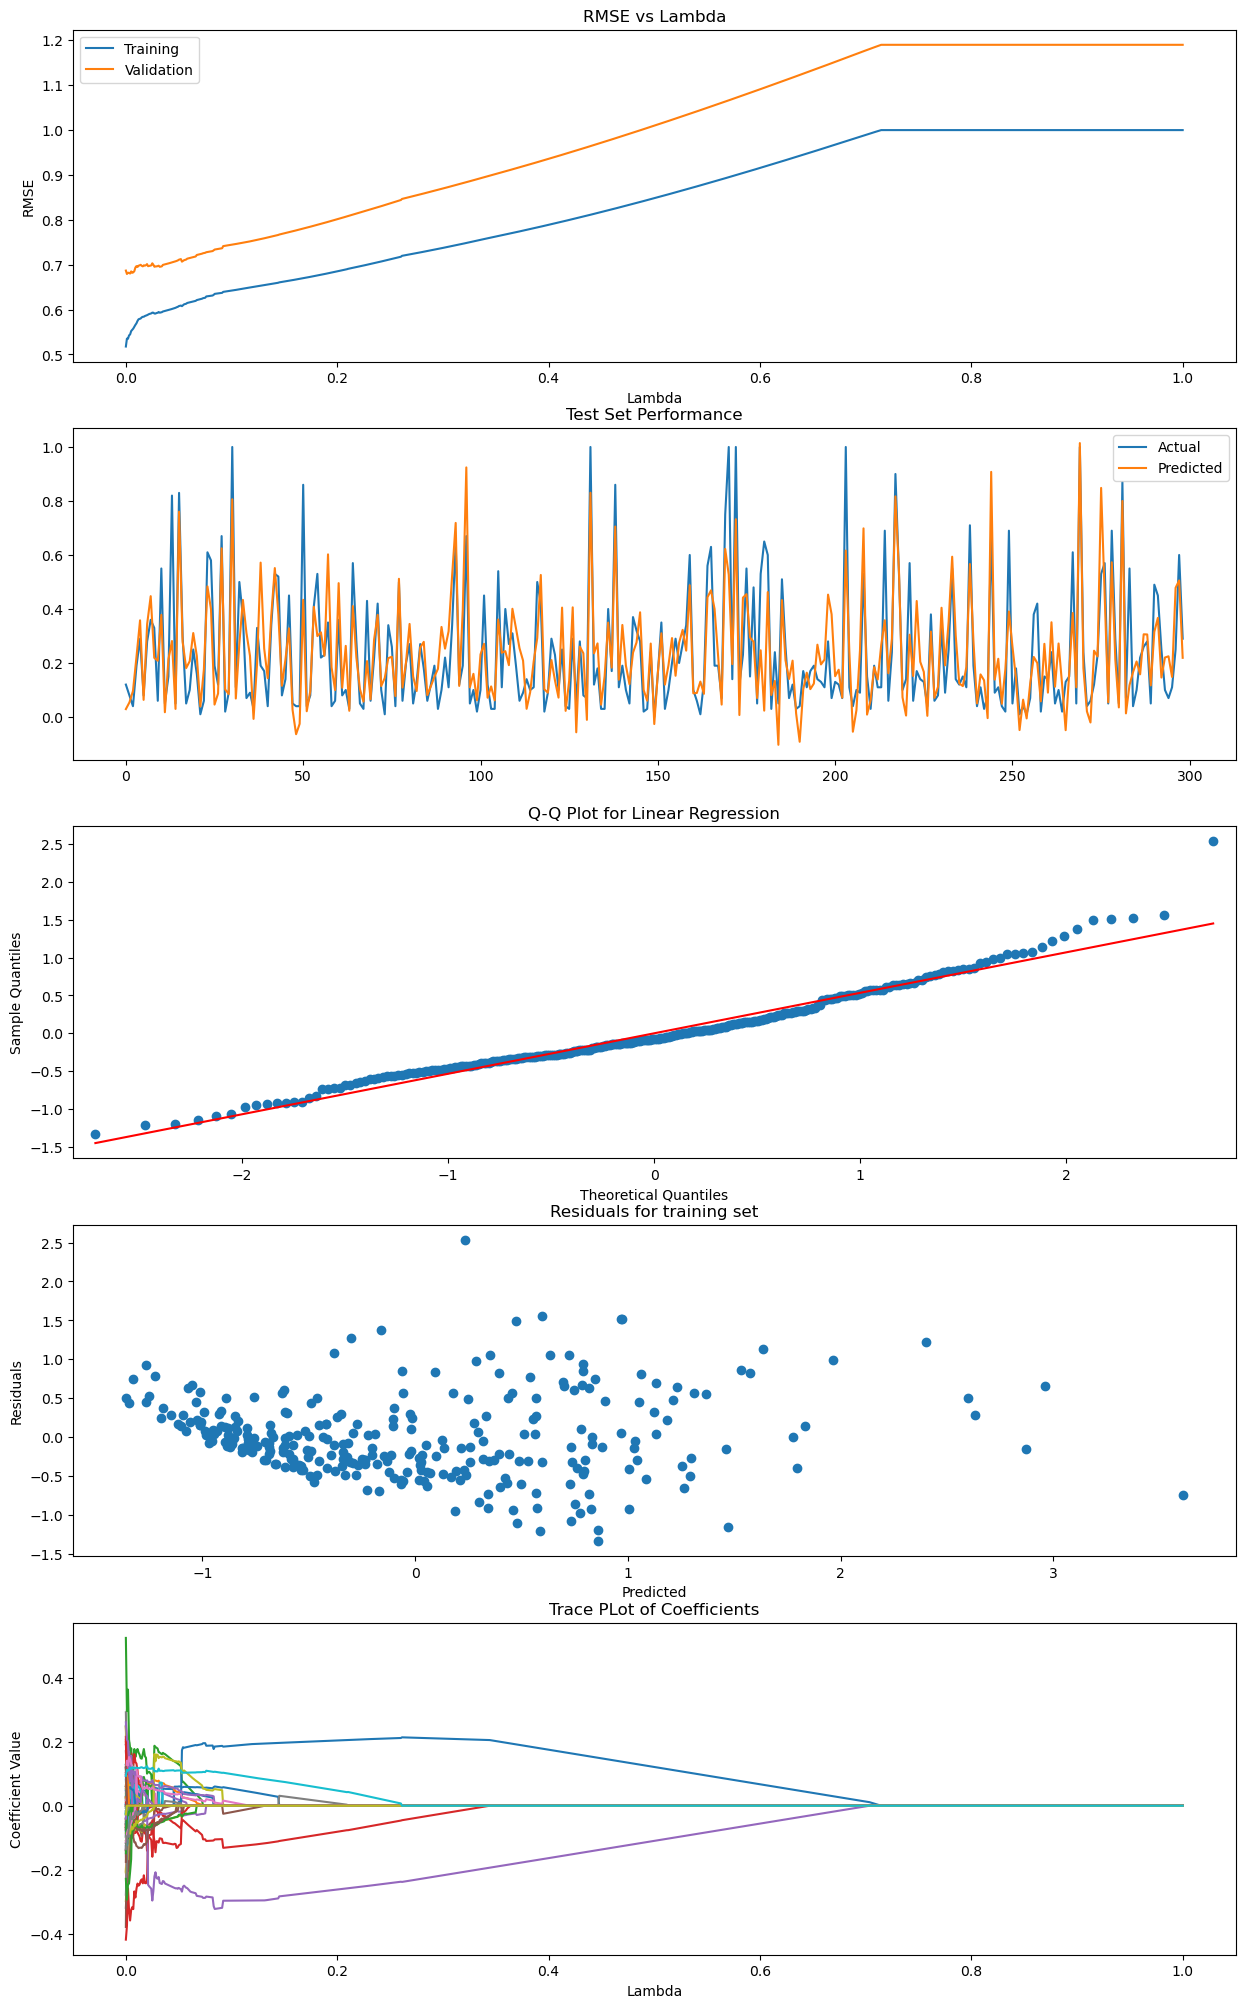

In [80]:
# setting L1_L2 to 1 will make it a lasson regression model
alpha_list = np.linspace(0, 1.0, 1000)
evaluate_regularisation(X_train_std, Y_train_std, X_val_std, Y_val_std, X_test_std, Y_test_std,
                        mu_train_y, sigma_train_y, alpha_list, 1)

### Comparing Models


In [81]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Evaluate linear regression model on test set
# y_pred_linreg = resulting_model.predict(X_test)
# mse_linreg = mean_squared_error(y_test, y_pred_linreg)
# r2_linreg = r2_score(y_test, y_pred_linreg)

# Evaluate Ridge regression model on test set
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Evaluate LASSO regression model on test set
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Compute cross-validation scores for each model
# cv_scores_linreg = cross_val_score(resulting_model, X_train, y_train, cv=5)
cv_scores_ridge = cross_val_score(ridge_model, X_train, y_train, cv=5)
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5)

# Print results
print("Linear regression:")
# print("MSE on test set:", mse_linreg)
# print("R-squared on test set:", r2_linreg)
# print("Cross-validation scores:", cv_scores_linreg)
print("\n")

print("Ridge regression:")
print("MSE on test set:", mse_ridge)
print("R-squared on test set:", r2_ridge)
print("Cross-validation scores:", cv_scores_ridge)
print("\n")

print("LASSO regression:")
print("MSE on test set:", mse_lasso)
print("R-squared on test set:", r2_lasso)
print("Cross-validation scores:", cv_scores_lasso)
print("\n")


Linear regression:


Ridge regression:
MSE on test set: 0.017776375494310638
R-squared on test set: 0.6618972055727285
Cross-validation scores: [0.41823415 0.64121127 0.55407329 0.60269106 0.39192434]


LASSO regression:
MSE on test set: 0.017675004487008823
R-squared on test set: 0.6638252600770689
Cross-validation scores: [0.40252809 0.64722412 0.62254822 0.64019272 0.43711577]


